# Import des librairies utiles

In [ ]:
import pandas as pd
from sklearn.utils import shuffle
import librosa, librosa.display
#librosa.load(file, sr=22050)
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import os
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# split the dataset 
from sklearn.model_selection import train_test_split 
import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav

from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import numpy as np
np.random.seed(1234)
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")
#import keras (high level API) wiht tensorflow as backend
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
#in
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import pywt
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint 
from datetime import datetime
import keras
from keras.layers import Bidirectional
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

file1 = "/content/drive/MyDrive/IRobot/AbouVoices/abou10.wav"
file2 = "/content/drive/MyDrive/IRobot/16000_pcm_speeches/Benjamin_Netanyau/1.wav"

TensorFlow version: 2.4.1


#Apercu graphique des signaux à données brutes
- Nous regardons les sgnaux
-  Cette représentation ne donne pas de sens sur la différence entre ces signaux.

Text(0.5, 1.0, 'Waveform')

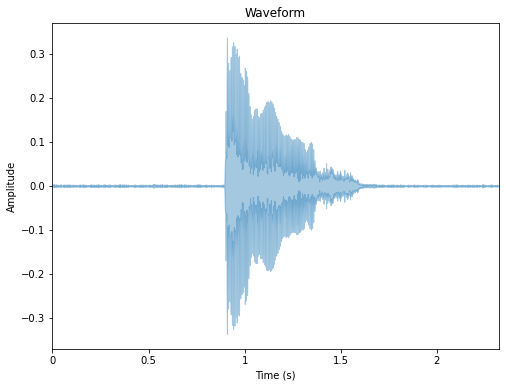

In [ ]:
FIG_SIZE = (8,6)

# load audio file with Librosa
signal1, sample_rate1 = librosa.load(file1, sr=22050) 
signal2, sample_rate2 = librosa.load(file2, sr=22050)

# WAVEFORM
# un exemple affichage  signal sans transformée 
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal1, sample_rate1, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

# Est-ce que la fréquence d'échantillonnage est la meme que celle fixée par librosa ?
- Eh bien la réponse est non

In [ ]:
librosa_audio, librosa_sample_rate = librosa.load(file1)
scipy_sample_rate, scipy_audio = wav.read(file1)
print("Original sample rate: {}".format(scipy_sample_rate))
print("Librosa sample rate: {}".format(librosa_sample_rate))

print('Original audio file min~max range: {} to {}'.format(np.min(scipy_audio), np.max(scipy_audio)))
print('Librosa audio file min~max range: {0:.2f} to {0:.2f}'.format(np.min(librosa_audio), np.max(librosa_audio)))

Original sample rate: 48000
Librosa sample rate: 22050
Original audio file min~max range: -6290 to 11024
Librosa audio file min~max range: -0.19 to -0.19


#Un apercu de quelques transformées 

1.   MFCCS
2.   Fourier







(40, 101)


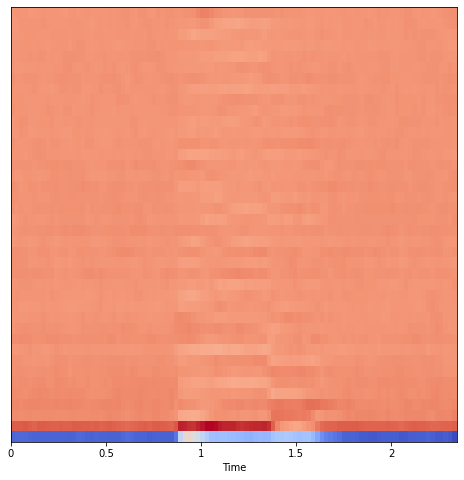

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc = 40)
print(mfccs.shape)
plt.figure(figsize=(8,8))
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')
plt.savefig('MFCCs.png')

#Features extractions
Cette partie est consacrée à la création de différentes fonctions, nous permettant de faire les transformées, on distingue 
- MFCCS
- Constant Q transform
- STFT Fourier
- MEL spectogram


In [ ]:
# extraire MFCCS d'un audio
def extract_mffcs(file_name):
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
  mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40) # changer n_mfcc pour voir la différence
  return np.mean(mfccs.T,axis=0) #1D array
  #mfccs.T #2D array
#print(extract_mffcs(file1).shape)

#Constant Q transform
def extract_Qtransform_features(file_name):
  s, fs = librosa.load(file2)
  fmin = librosa.midi_to_hz(36)
  hop_length = 512
  C = librosa.cqt(y=s, sr=fs, fmin=fmin, n_bins=72, hop_length=hop_length)
  logC = librosa.amplitude_to_db(np.abs(C))
  return C.T 
  """np.mean(C.T,axis=0)"""

#STFT  
def extract_stft(file):
  audio, sample_rate1 = librosa.load(file, sr=22050)
  X = librosa.stft(audio,n_fft=400)
  Xdb = librosa.amplitude_to_db(abs(X))
  return np.mean(Xdb.T,axis=0) #1D
print(extract_Qtransform_features(file1).shape)
#plt.imshow(extract_Qtransform_features(file1)) # la sortie , une image 44*44


from scipy import signal
filtcoefs25 = signal.butter(10, 25, 'lp', fs=10000, output='sos')
#to see the impact of filtering on MFCCS
def extract_and_filtering(file):
  y, sr = librosa.load(file, res_type='kaiser_fast')
  y_ = signal.sosfilt(filtcoefs25, y)
  v = np.arange(1,len(y) ,100)
  audio =  y_[v]
  mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
  return np.mean(mfccs.T,axis=0)

#la transformée melspectrogram qui n'a pas porté fruits
# faudrait aussi revoir Constant Q transform
#res = get_file_and_transform(directory1,0)
n_mels = 80
def pre_process_audio_mel_t(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 

    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sample_rate,
                                              n_mels=n_mels)
    mel_db = (librosa.power_to_db(mel_spec, ref=np.max) + 40) / 40
    return np.mean(mel_spec.T,axis=0)


(44, 72)


In [ ]:
extract_mffcs("/content/drive/MyDrive/IRobot/16000_pcm_speeches/Benjamin_Netanyau/0.wav").shape

(40,)

#Loading files and transform

Cette fonction *get_file_and_transform* récupére un fichier et lui applique une transformée au choix en attribuant à chaque signal un label considérant le locuteur

In [ ]:
 # we get only 100 samples per speaker
directory1 = "/content/drive/MyDrive/IRobot/16000_pcm_speeches/Benjamin_Netanyau"
directory2 = "/content/drive/MyDrive/IRobot/16000_pcm_speeches/Nelson_Mandela"
directory3 = "/content/drive/MyDrive/IRobot/16000_pcm_speeches/Magaret_Tarcher"
directory4 ="/content/drive/MyDrive/IRobot/16000_pcm_speeches/Jens_Stoltenberg"
directory5 = "/content/drive/MyDrive/IRobot/16000_pcm_speeches/Julia_Gillard"

def get_file_and_transform(directory, y, function):
  data = list() #liste vide
  for filename in os.listdir(directory): #parcourir le dossier 
    #print(os.path.join(directory, filename))
    X = function(os.path.join(directory, filename)) #pour chaq sous dossier ,
    data.append([X, y])
  return pd.DataFrame(data, columns = ['X', 'y'])

In [ ]:

print(len(os.listdir("/content/drive/MyDrive/IRobot/abou2_Voices/splitedWAv"))) # il y'a 1500 audio en moyenne.

1545


In [ ]:
print(len(os.listdir(directory5)))

1511


# A ne pas compiler pour l'instant

In [ ]:
#on utilise la transformée avec la fonction extract_stft
#deja fait pour extract_mfccs
#dataNetanyahu = get_file_and_transform(directory1, 0, pre_process_audio_mel_t)
#dataMandella = get_file_and_transform(directory2,1, pre_process_audio_mel_t)
#data_Magaret_Tarcher = get_file_and_transform(directory3, 2, pre_process_audio_mel_t)
#data_Jens_Stoltenberg = get_file_and_transform(directory4, 3, pre_process_audio_mel_t)
#Julia_Gillard = get_file_and_transform(directory5, 4, pre_process_audio_mel_t)
#voices = [dataMandella,dataNetanyahu, data_Magaret_Tarcher,Julia_Gillard, data_Jens_Stoltenberg]

#store_data(voices,"/content/drive/MyDrive/IRobot/mfcc_Voxleb2D")

In [ ]:
#store_data(voices,"/content/drive/MyDrive/IRobot/mfcc_Voxleb1D")

In [ ]:
#e, f = create_data_set(voices)
#r = e.reshape(e.shape[0], e.shape[1]*e.shape[2])
#r.reshape(r.shape[0],44,40).shape
#avant de la stocker on va modifier la dimension
# penser à la remodifier une fois qu'elle est téléchargée
#pd.concat([pd.DataFrame(r),pd.DataFrame(f)],axis=1).to_csv("/content/drive/MyDrive/IRobot/mfcc_Voxleb2D",index=False)
#np.hstack( (e,f) )
#e.shape

In [ ]:
#essayons de telechagrer MFCCS à 2 dimensions
#adaptée à un réseau conv2D
#a, b = load_dataset("/content/drive/MyDrive/IRobot/mfcc_Voxleb2D")
#a.shape, b.shape

((7531, 1760), (7531, 5))

#Creation de fonctions importantes pour la manipulation des données et transformations

In [ ]:
#voices = [dataMandella,dataNetanyahu, data_Magaret_Tarcher,Julia_Gillard, data_Jens_Stoltenberg]
# elle sert à créer la data set après transformée
def create_data_set(voices):
  df = shuffle(pd.concat(voices))
  data, target = df.X, df.y
  X = np.array(data.tolist())
  y = np.array(target.tolist())
  return X, y

# la stocker au format csv
def store_data(voices, file):
  X, y = create_data_set(voices)
  return pd.concat([pd.DataFrame(X),pd.DataFrame(y)],axis=1).to_csv(file,index=False)

#la récupérer pour l'exploiter
def load_dataset(file):
  data = pd.read_csv(file)
  X,y = data.iloc[:,:-1],data.iloc[:,-1]  
  return X, encode_target(y)

#encoder la variable y au format one hot
def encode_target(y):
  le = LabelEncoder()
  yy = to_categorical(le.fit_transform(y))
  return yy
  #pd.concat([pd.DataFrame(X),pd.DataFrame(y)],axis=1).to_csv("file",index=False)


#données entrainements et tests
from sklearn.model_selection import train_test_split
def my_train_test_split(X,y, test_size):
  y =encode_target(y)
  return train_test_split(X, y, test_size=test_size, random_state = 127)

#Ensuite nous allons créer trois architectures de réseaux neurone :
-  Artifical Neural Network
-  Long Short Term Memory
-  Convolutional Neural Network


#Definition du réseau ANN

In [ ]:
#parametres importants pour le réseau
hidden1, hidden2, hidden3  = 156, 156, 100
dropout1, dropout2 = 0.5, 0.6
activation1, activation2 = "relu", "tanh"
optimizer = "RMSprop"
is_flattened=False

#définition du réseau
def ann_model(is_flattened,activation1,activation2,hidden1, hidden2, hidden3,dropout1, dropout2, optimizer):
    model = Sequential()
    if is_flattened : 
      model.add(Flatten(input_shape=(X.shape[1], X.shape[2])))
    model.add(Dense(hidden1))
    model.add(Activation(activation1))
    model.add(Dropout(dropout1))
    model.add(Dense(hidden2))
    model.add(Activation(activation2))
    model.add(Dropout(dropout2))
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    # Compile the model
    model.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer=optimizer)
    return model

#Creation du modele *LSTM*

In [ ]:
denseHidden1,denseHidden2 = 16,10
lstmHidden1, lstmHidden2 = 38, 32

def sequentialModel(X, lstmHidden1, lstmHidden2, denseHidden1, denseHidden2):
  model = Sequential()
  model.add(LSTM(lstmHidden1, activation='relu', return_sequences=True,input_shape=(X.shape[1], 1)))
  model.add(LSTM(lstmHidden2))
  #model.add(Dropout(0.0002))
  #model.add(Dense(128, activation="relu"))
  #model.add(Dropout(0.0001))
  model.add(Dense(denseHidden1, activation="tanh"))
  model.add(Dropout(0.2))
  #model.add(Dense(8, activation="tanh"))
  #model.add(Dropout(0.5))
  model.add(Dense(denseHidden2, activation="relu"))
  model.add(Dense(6, activation='softmax'))
  adam = keras.optimizers.Adam(lr=0.001)
  model.compile(optimizer="RMSprop", loss="categorical_crossentropy", metrics=["accuracy"])
  return model
  

#Creation du modele *CNN*

In [ ]:
#ces parametres peuvent etre changés pour entrainer le modele
nfilter1, nfilter2, cnnNeuron1, cnnNeuron2 = 3,3, 32, 32
cnnParamters = [nfilter1,nfilter2, cnnNeuron1, cnnNeuron2]
hidden1, hidden2, hidden3 = 8, 8, 2
denseLayerParams = [hidden1, hidden2, hidden3]
dropout = 0.001
optimizer = tf.keras.optimizers.RMSprop()
activation = "tanh"
#optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.1, beta_2=0.999,
#epsilon=None, decay=0.0, amsgrad=False)

def build_cnn_model(activation, input_shape, cnnParamters,denseLayerParams, dropout):
    model = Sequential()
    
    # 2 Convolution layer with Max polling
    model.add(Conv2D(cnnParamters[2], cnnParamters[0], activation = activation, padding = 'same', input_shape = input_shape))
    model.add(MaxPooling2D())
    model.add(Conv2D(cnnParamters[3], cnnParamters[1], activation = activation, padding = 'same', kernel_initializer = "he_normal"))
    model.add(MaxPooling2D()) 
    model.add(Flatten())
    
    # 3 Full connected layer
    model.add(Dense(denseLayerParams[0], activation = activation, kernel_initializer = "he_normal"))
    model.add(Dense(denseLayerParams[1], activation = activation, kernel_initializer = "he_normal"))
    model.add(Dropout(dropout))
    model.add(Dense(denseLayerParams[2], activation = activation, kernel_initializer = "he_normal"))


    model.add(Dense(num_labels, activation = 'softmax')) # 4 classes
    
    # summarize the model
    print(model.summary())
    return model
#SGD donne des nan
#Adadelta échoue 
#Adam -> 88%
#RMSprop -> 94%
def compile_and_fit_model(model, X_train, y_train, X_test, y_test, batch_size, n_epochs, optimizer):

    # compile the model
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    # define callback
    # fit the model
    history = model.fit(x=X_train,
                        y=y_train,
                        batch_size=batch_size,
                        epochs=n_epochs,
                        verbose=1,
                        validation_data=(X_test, y_test))
    
    return model, history

# shape of the input images
#input_shape = (X_train_cwt_.shape[1], X_train_cwt_.shape[2], X_train_cwt_.shape[3])

# create cnn model
#cnn_model = build_cnn_model("relu", input_shape)
# train cnn model
#trained_cnn_model, cnn_history = compile_and_fit_model(cnn_model, X_train_cwt_, ytrain, X_test_cwt_, ytest, 50, 27)
# ici avec un petit réseau de 12.000 paramètres
# l'échantillonnage n'a pas un effet très discriminant

#Application des modeles sur les transformées :
- MFCCS
- STFT
- Mel Spectogram

#MFCCS
-  Transormée MFCCS 
-  Récupération des données après transformation

In [ ]:
newdirectory = "/content/drive/MyDrive/IRobot/abou2Voices/splitedWAv"

#on utilise la transformée avec la fonction extract_stft
dataNetanyahu = get_file_and_transform(directory1, 0, extract_mffcs)
dataMandella = get_file_and_transform(directory2,1, extract_mffcs)
data_Magaret_Tarcher = get_file_and_transform(directory3, 2, extract_mffcs)
data_Jens_Stoltenberg = get_file_and_transform(directory4, 3, extract_mffcs)
Julia_Gillard = get_file_and_transform(directory5, 4, extract_mffcs)
abou = get_file_and_transform(newdirectory, 6, extract_mffcs)
voices = [dataMandella,dataNetanyahu,abou, data_Magaret_Tarcher,Julia_Gillard, data_Jens_Stoltenberg]


#nouveau
#file ="/content/drive/MyDrive/IRobot/mfcc1Dversion2"

#Xmfccs1D, yMfccs1D= load_dataset(file)
#Xmfccs1D.shape, yMfccs1D.shape
#x_train, x_test, y_train, y_test = train_test_split(Xmfccs1D,yMfccs1D)

# mcfccs sans le mean (flatten, conv2D)
# fourier sans le mean (flatten) et les sauvegarder


In [ ]:
y_train.shape # 6 classes 

(6807, 6)

In [ ]:
# stockage --> déjà fait
store_data(voices,"/content/drive/MyDrive/IRobot/mfcc1Dversion4")

In [ ]:
#nouveau
file ="/content/drive/MyDrive/IRobot/mfcc1Dversion4"

Xmfccs1D, yMfccs1D= load_dataset(file)
print(Xmfccs1D.shape, yMfccs1D.shape)
x_train, x_test, y_train, y_test = train_test_split(Xmfccs1D,yMfccs1D)

# mcfccs sans le mean (flatten, conv2D)
# fourier sans le mean (flatten) et les sauvegarder
#X_, y_ = create_data_set(abou)
#yR = (np.argmax(yMfccs1D, axis=1)+1).reshape(-1, 1)
#np.concatenate(X_,Xmfccs1D)
#np.concatenate(y_,yR)



(9076, 40) (9076, 6)


# Application d'un réseau ANN sur les données MFCCS

In [ ]:
##PARAMETERS
#NB : sur MFCCS et Wavelet, un batch de 1 est le meilleur pour un bon score.
num_epochs = 10
num_batch_size = 1
num_labels = y_train.shape[1]
filter_size = 2
activation1, activation2 = "tanh", "tanh"
hidden1, hidden2, hidden3  = 12, 11, 9
optimizer = "RMSprop" # ou dam ou SGD
dropout1, dropout2 = 0.001, 0.3

ann_MFFCSModel = ann_model(False,activation1,activation2,hidden1, hidden2, hidden3,dropout1, dropout2,optimizer)


ann_MFFCSModel.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)
ann_MFFCSModel.summary()

# Display model architecture summary 
ann_MFFCSModel.summary() # error
# Calculate pre-training accuracy 
score = ann_MFFCSModel.evaluate(x_test, y_test, verbose=0)
#accuracy = 100*score[1]

Epoch 1/10
6807/6807 [==============================] - 10s 1ms/step - loss: 1.1699 - accuracy: 0.5379 - val_loss: 0.4217 - val_accuracy: 0.8480
Epoch 2/10
6807/6807 [==============================] - 8s 1ms/step - loss: 0.4236 - accuracy: 0.8697 - val_loss: 0.2565 - val_accuracy: 0.9273
Epoch 3/10
6807/6807 [==============================] - 9s 1ms/step - loss: 0.3152 - accuracy: 0.9232 - val_loss: 0.1629 - val_accuracy: 0.9617
Epoch 4/10
6807/6807 [==============================] - 8s 1ms/step - loss: 0.1938 - accuracy: 0.9612 - val_loss: 0.1218 - val_accuracy: 0.9784
Epoch 5/10
6807/6807 [==============================] - 8s 1ms/step - loss: 0.1733 - accuracy: 0.9635 - val_loss: 0.1673 - val_accuracy: 0.9775
Epoch 6/10
6807/6807 [==============================] - 9s 1ms/step - loss: 0.1679 - accuracy: 0.9683 - val_loss: 0.1682 - val_accuracy: 0.9753
Epoch 7/10
6807/6807 [==============================] - 8s 1ms/step - loss: 0.1424 - accuracy: 0.9756 - val_loss: 0.1115 - val_accuracy

In [ ]:
#un autre modèle

yR = (np.argmax(yMfccs1D, axis=1)+1).reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(Xmfccs1D,yR)

# Ajouter des voix

In [ ]:
newdirectory = "/content/drive/MyDrive/IRobot/abou2Voices/splitedWav"
abou = get_file_and_transform(newdirectory, 6, extract_mffcs)
voices_ = [abou]
X_, y_ = create_data_set(voices_)

#Application d'un réseau CNN avec les données MFCCS 2D

In [ ]:
#il faudrait préparer les données 2D
file ="/content/drive/MyDrive/IRobot/mfcc_Voxleb2D"
Xmfccs2D, yMfccs2D= load_dataset(file)
Xmfccs2D.shape, yMfccs2D.shape
Xmfccs2D = Xmfccs2D.values.reshape(7531, 44, 40,1)
x_train, x_test, y_train, y_test = train_test_split(Xmfccs2D,yMfccs2D)

# mcfccs sans le mean (flatten, conv2D)
# fourier sans le mean (flatten) et les sauvegarder
#b.shape

input_shape = ( x_train.shape[1], x_train.shape[2],1)

cnn_model = build_cnn_model(activation, input_shape, cnnParamters,denseLayerParams, dropout)
# train cnn model
trained_cnn_model, cnn_history = compile_and_fit_model(cnn_model, x_train, y_train, x_test, y_test, 50, 37,optimizer)

# Transofrmées Fourier et tous ses résultats en classif
- Dans cette partie, nous appliquerons la transformée MFCCS sur les audio
- Puis nous testerons plusieurs méthodes de classif

#Récupération des données et traitement afin de constituer la dataset

In [ ]:
#on utilise la transformée avec la fonction extract_stft
newdirectory = "/content/drive/MyDrive/IRobot/abou2_Voices/splitedWAv"
dataNetanyahu = get_file_and_transform(directory1, 0, extract_stft)
dataMandella = get_file_and_transform(directory2,1, extract_stft)
data_Magaret_Tarcher = get_file_and_transform(directory3, 2, extract_stft)
data_Jens_Stoltenberg = get_file_and_transform(directory4, 3, extract_stft)
Julia_Gillard = get_file_and_transform(directory5, 4, extract_stft)
abou = get_file_and_transform(newdirectory, 6, extract_stft)
voices = [dataMandella,dataNetanyahu, abou,data_Magaret_Tarcher,Julia_Gillard, data_Jens_Stoltenberg]

In [ ]:
store_data(voices,"/content/drive/MyDrive/IRobot/fourier1DFinal")

In [ ]:
file2 ="/content/drive/MyDrive/IRobot/fourier1DFinal"

Xfourier1D, yfourier1D= load_dataset(file2)
Xfourier1D.shape, yfourier1D.shape
x_train, x_test, y_train, y_test = train_test_split(Xfourier1D,yfourier1D)
num_labels = y_train.shape[1]


In [ ]:
#on utilise la transformée avec la fonction extract_stft
#dataNetanyahu = get_file_and_transform(directory1, 0, extract_stft)
#dataMandella = get_file_and_transform(directory2,1, extract_stft)
#data_Magaret_Tarcher = get_file_and_transform(directory3, 2, extract_stft)
#data_Jens_Stoltenberg = get_file_and_transform(directory4, 3, extract_stft)
#Julia_Gillard = get_file_and_transform(directory5, 4, extract_stft)
#abou = get_file_and_transform(newdirectory, 6, extract_mffcs)

#voices = [dataMandella,dataNetanyahu, abou,data_Magaret_Tarcher,Julia_Gillard, data_Jens_Stoltenberg]

#a, b= create_data_set(voices)
#a.shape, encode_target(b).shape
#x_train, x_test, y_train, y_test = my_train_test_split(a,b,0.2)

#file1 ="/content/drive/MyDrive/IRobot/fourier_Voxleb1D"



##PARAMETERS
#NB : sur MFCCS et Wavelet, un batch de 1 est le meilleur pour un bon score.
num_epochs = 15
num_batch_size = 5
num_labels = y_train.shape[1]
filter_size = 2
activation1, activation2 = "relu", "relu"
hidden1, hidden2, hidden3  = 12, 13, 12
optimizer = "RMSprop" # ou dam ou SGD
dropout1, dropout2 = 0.01, 0.01

ann_MFFCSModel = ann_model(False,activation1,activation2,hidden1, hidden2, hidden3,dropout1, dropout2,optimizer)


ann_MFFCSModel.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)
ann_MFFCSModel.summary()

# Display model architecture summary 
# Calculate pre-training accuracy 
score = ann_MFFCSModel.evaluate(x_test, y_test, verbose=0)
#accuracy = 100*score[1]


Epoch 1/15
1362/1362 [==============================] - 3s 2ms/step - loss: 1.2542 - accuracy: 0.5807 - val_loss: 0.4561 - val_accuracy: 0.8149
Epoch 2/15
1362/1362 [==============================] - 2s 1ms/step - loss: 0.5505 - accuracy: 0.8002 - val_loss: 0.3612 - val_accuracy: 0.8704
Epoch 3/15
1362/1362 [==============================] - 2s 1ms/step - loss: 0.4215 - accuracy: 0.8550 - val_loss: 0.2653 - val_accuracy: 0.8938
Epoch 4/15
1362/1362 [==============================] - 2s 1ms/step - loss: 0.3586 - accuracy: 0.8824 - val_loss: 0.2294 - val_accuracy: 0.9114
Epoch 5/15
1362/1362 [==============================] - 2s 1ms/step - loss: 0.3189 - accuracy: 0.8965 - val_loss: 0.1940 - val_accuracy: 0.9343
Epoch 6/15
1362/1362 [==============================] - 3s 2ms/step - loss: 0.2917 - accuracy: 0.9118 - val_loss: 0.3062 - val_accuracy: 0.9052
Epoch 7/15
1362/1362 [==============================] - 2s 1ms/step - loss: 0.2883 - accuracy: 0.9138 - val_loss: 0.1919 - val_accuracy:

Fourier 2D

In [ ]:
#on utilise la transformée avec la fonction extract_stft
dataNetanyahu = get_file_and_transform(directory1, 0, extract_stft)
dataMandella = get_file_and_transform(directory2,1, extract_stft)
data_Magaret_Tarcher = get_file_and_transform(directory3, 2, extract_stft)
data_Jens_Stoltenberg = get_file_and_transform(directory4, 3, extract_stft)
Julia_Gillard = get_file_and_transform(directory5, 4, extract_stft)
voices = [dataMandella,dataNetanyahu, data_Magaret_Tarcher,Julia_Gillard, data_Jens_Stoltenberg]


In [ ]:
a, b= create_data_set(voices)
a.shape, encode_target(b).shape
x_train, x_test, y_train, y_test = my_train_test_split(a,b,0.2)


In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], x_test.shape[2],1)


# Fourier en Image
- La transformée 2D donne de mauvais résultats

In [ ]:


# le transformer de fourier en image ne fonctionne pas bien 
# fourier sans le mean (flatten) et les sauvegarder
#b.shape

input_shape = ( x_test.shape[1], x_test.shape[2],1)
cnn_model = build_cnn_model("relu", input_shape)
# train cnn model
trained_cnn_model, cnn_history = compile_and_fit_model(cnn_model, x_train, y_train, x_test, y_test, 50, 37)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 201, 221, 32)      320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 100, 110, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 110, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 55, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 88000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                1408016   
_________________________________________________________________
dense_5 (Dense)              (None, 16)               

KeyboardInterrupt: ignored

#MEL SPECTOGRAM

In [ ]:
#on utilise la transformée avec la fonction extract_stft
#deja fait pour extract_mfccs
newdirectory = "/content/drive/MyDrive/IRobot/abou2_Voices/splitedWAv"

dataNetanyahu = get_file_and_transform(directory1, 0, pre_process_audio_mel_t)
dataMandella = get_file_and_transform(directory2,1, pre_process_audio_mel_t)
data_Magaret_Tarcher = get_file_and_transform(directory3, 2, pre_process_audio_mel_t)
data_Jens_Stoltenberg = get_file_and_transform(directory4, 3, pre_process_audio_mel_t)
Julia_Gillard = get_file_and_transform(directory5, 4, pre_process_audio_mel_t)

abou = get_file_and_transform(newdirectory, 6, pre_process_audio_mel_t)

voices = [dataMandella,dataNetanyahu,abou, data_Magaret_Tarcher,Julia_Gillard, data_Jens_Stoltenberg]

#num_epochs = 20
#num_batch_size = 100
#ann_STFTModel = ann_model(loss="categorical_crossentropy", activation="softmax")

#ann_STFTModel.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)
#ann_STFTModel.summary()

# Display model architecture summary 
#ann_STFTModel.summary() # error
# Calculate pre-training accuracy 
#score = ann_STFTModel.evaluate(x_test, y_test, verbose=0)
#accuracy = 100*score[1]


In [ ]:
store_data(voices,"/content/drive/MyDrive/IRobot/MelSpectoFinal")

In [ ]:
#nouveau
file ="/content/drive/MyDrive/IRobot/MelSpectoFinal"

XmelSpecto, yMelSpecto= load_dataset(file)
print(XmelSpecto.shape, yMelSpecto.shape)
x_train, x_test, y_train, y_test = train_test_split(XmelSpecto,yMelSpecto)

(9076, 80) (9076, 6)


In [ ]:
#a, b= create_data_set(voices)
#a.shape, encode_target(b).shape
#x_train, x_test, y_train, y_test = my_train_test_split(a,b,0.2)

num_epochs = 20
num_batch_size = 10
num_labels = y_train.shape[1]
filter_size = 3
activation1, activation2 = "relu", "relu"
hidden1, hidden2, hidden3  = 12, 13, 14
optimizer = "Adam" # ou dam ou SGD
dropout1, dropout2 = 0.002, 0.02

ann_MelSpectogram = ann_model(False,activation1,activation2,hidden1, hidden2, hidden3,dropout1, dropout2,optimizer)


ann_MelSpectogram.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)
ann_MelSpectogram.summary()


Epoch 1/20
681/681 [==============================] - 2s 2ms/step - loss: 7.8398 - accuracy: 0.3595 - val_loss: 1.1663 - val_accuracy: 0.6285
Epoch 2/20
681/681 [==============================] - 1s 2ms/step - loss: 1.1931 - accuracy: 0.6087 - val_loss: 0.9096 - val_accuracy: 0.6774
Epoch 3/20
681/681 [==============================] - 1s 2ms/step - loss: 0.8888 - accuracy: 0.6783 - val_loss: 0.7659 - val_accuracy: 0.7457
Epoch 4/20
681/681 [==============================] - 1s 2ms/step - loss: 0.7435 - accuracy: 0.7415 - val_loss: 0.6778 - val_accuracy: 0.7695
Epoch 5/20
681/681 [==============================] - 1s 2ms/step - loss: 0.6470 - accuracy: 0.7732 - val_loss: 0.5865 - val_accuracy: 0.8056
Epoch 6/20
681/681 [==============================] - 1s 2ms/step - loss: 0.5314 - accuracy: 0.8145 - val_loss: 0.5068 - val_accuracy: 0.8308
Epoch 7/20
681/681 [==============================] - 1s 2ms/step - loss: 0.4708 - accuracy: 0.8336 - val_loss: 0.4615 - val_accuracy: 0.8462
Epoch 

#LSTM and Mel Spectogram

In [ ]:
denseHidden1,denseHidden2 = 16,10
lstmHidden1, lstmHidden2 = 38, 32
X, y = XmelSpecto, yMelSpecto
Xlstm = np.array(X).reshape(X.shape[0], X.shape[1],1)

model = sequentialModel(Xlstm, lstmHidden1, lstmHidden2, denseHidden1, denseHidden2)



Xtrain, Xtest, ytrain, ytest = train_test_split(Xlstm,y)
model.fit(Xtrain, ytrain, epochs=5, verbose=1, batch_size=10, validation_data=(Xtest, ytest))
model.summary()

Epoch 1/5
681/681 [==============================] - 42s 57ms/step - loss: 1.5775 - accuracy: 0.3266 - val_loss: 1.3807 - val_accuracy: 0.4191
Epoch 2/5
681/681 [==============================] - 39s 56ms/step - loss: 1.4770 - accuracy: 0.3588 - val_loss: 1.5469 - val_accuracy: 0.3336
Epoch 3/5
681/681 [==============================] - 39s 57ms/step - loss: 1.5337 - accuracy: 0.3294 - val_loss: 1.6000 - val_accuracy: 0.3178
Epoch 4/5
681/681 [==============================] - 38s 56ms/step - loss: 1.5298 - accuracy: 0.3417 - val_loss: 1.4714 - val_accuracy: 0.3759
Epoch 5/5
681/681 [==============================] - 38s 56ms/step - loss: 1.5029 - accuracy: 0.3553 - val_loss: 1.3747 - val_accuracy: 0.4187
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 80, 38)            6080      
_________________________________________________________________

j'ai testé une variante avec Flatten et un mfcc à deux dimensions, par contre on a trop de paramètres et on n'a pas un score de ouf et on a un overfiting.

#Analyse par ondelette


IndexError: ignored

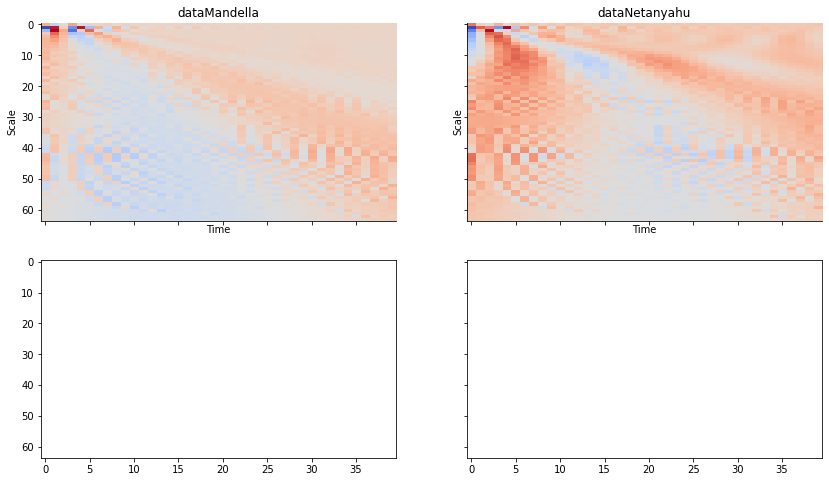

In [ ]:
#WAVELET ANALYSIS
#using MFCCS 1D
X , yy= Xmfccs1D.values, yMfccs1D
X = X.reshape((X.shape[0], X.shape[1], 1))
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,yy)
def split_indices_per_label(y):
  indicies_per_label = [[] for x in range(0,4)]
  for i in range(4): 
    indicies_per_label[i] = np.where(y == i)[0]
  return indicies_per_label

def plot_cwt_coeffs_per_label(X, label_indicies, label_names, signal, sample, scales, wavelet):
    
    fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(14,8))
    
    for ax, indices, name in zip(axs.flat, label_indicies, label_names):
        # apply  PyWavelets continuous wavelet transfromation function
        coeffs, freqs = pywt.cwt(X[indices[sample],:, signal], scales, wavelet = wavelet)
        # create scalogram
        ax.imshow(coeffs, cmap = 'coolwarm', aspect = 'auto')
        ax.set_title(name)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_ylabel('Scale')
        ax.set_xlabel('Time')
    plt.tight_layout()

# list of list of sample indicies per activity
train_labels_indicies = split_indices_per_label(yy)

#signal indicies: 0 = body acc x, 1 = body acc y, 2 = body acc z, 3 = body gyro x, 4 = body gyro y, 5 = body gyro z, 6 = total acc x, 7 = total acc y, 8 = total acc z
signal = 0 # signal index
sample = 1 # sample index of each label indicies list
scales = np.arange(1, 65) # range of scales
wavelet = 'morl' # mother wavelet
LABEL_NAMES = ["dataMandella","dataNetanyahu", "data_Magaret_Tarcher","data_Jens_Stoltenberg"]

plot_cwt_coeffs_per_label(Xtrain, train_labels_indicies, LABEL_NAMES, signal, sample, scales, wavelet)







In [ ]:
def create_cwt_images(X, n_scales, rescale_size, wavelet_name = "morl"):
    n_samples = X.shape[0] 
    n_signals = X.shape[2] 
    
    # range of scales from 1 to n_scales
    scales = np.arange(1, n_scales + 1) 
    
    # pre allocate array
    X_cwt = np.ndarray(shape=(n_samples, rescale_size, n_scales, n_signals), dtype = 'float32')
    
    for sample in range(n_samples):
        if sample % 1000 == 0:
            print(sample)
        for signal in range(n_signals):
            serie = X[sample, :, signal]
            # continuous wavelet transform 
            coeffs, freqs = pywt.cwt(serie, scales, wavelet_name)
            # resize the 2D cwt coeffs
            rescale_coeffs = resize(coeffs, (rescale_size, n_scales), mode = 'constant')
            X_cwt[sample,:,:,signal] = rescale_coeffs
            
    return X_cwt
  
# amount of pixels in X and Y 
rescale_size = 12
# determine the max scale size
n_scales = 12

X_train_cwt_ = create_cwt_images(Xtrain, n_scales, rescale_size)
print(f"shapes (n_samples, x_img, y_img, z_img) of X_train_cwt: {X_train_cwt_.shape}")
X_test_cwt_ = create_cwt_images(Xtest, n_scales, rescale_size)
print(f"shapes (n_samples, x_img, y_img, z_img) of X_test_cwt: {X_test_cwt_.shape}")



0
1000
2000
3000
4000
5000
6000
shapes (n_samples, x_img, y_img, z_img) of X_train_cwt: (6807, 12, 12, 1)
0
1000
2000
shapes (n_samples, x_img, y_img, z_img) of X_test_cwt: (2269, 12, 12, 1)


#Réseau Convolutionnel
- Pour ondelette
- MFFCS version à deux dimensions

In [ ]:
# avec constant q transform
# q transform ne marche pas.
#X_  = a.reshape((a.shape[0], a.shape[1], a.shape[2], 1))
#Xtrain, Xtest, ytrain, ytest = my_train_test_split(X_,b,0.2)

#Xtrain.shape
#Xtrain, Xtest, ytrain, ytest = train_test_split(X_,yy)

#ces parametres peuvent etre changés pour entrainer le modele
nfilter1, nfilter2, cnnNeuron1, cnnNeuron2 = 3,3, 14, 12
cnnParamters = [nfilter1,nfilter2, cnnNeuron1, cnnNeuron2]
hidden1, hidden2, hidden3 = 10, 10, 10
denseLayerParams = [hidden1, hidden2, hidden3]
dropout = 0.01
optimizer = tf.keras.optimizers.Adam() # ou RMSprop

input_shape = (X_train_cwt_.shape[1], X_train_cwt_.shape[2],1)
cnn_model = build_cnn_model("relu", input_shape,cnnParamters,denseLayerParams,dropout)
# train cnn model
trained_cnn_model, cnn_history = compile_and_fit_model(cnn_model, X_train_cwt_, ytrain, X_test_cwt_, ytest, 1, 27,optimizer)

# avec un batch de 50, on a de bons résultats
# haha mieux encore avec 10, décidémment un mini batch
# avec 1 batch et 3029 param -> on a 95%
# meilleur score 

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 12, 12, 14)        140       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 14)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 12)          1524      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 12)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 108)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1090      
_________________________________________________________________
dense_21 (Dense)             (None, 10)               

#Essai d'un modele LSTM sur les données  MFCCS

In [ ]:
#ESSAI LSTM
#apprently lstm learns better with an ACP
# because it can't support more than 400 dim
import keras
from keras.layers import Bidirectional
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X, y = Xmfccs1D, yMfccs1D
# le lstm supportait pas la fenetre de 5sec
#j'ai donc fait un acp en voudrant 44 colonnes
#pca = PCA(n_components=4)
#Xpca1 = np.array(X)[:,:]
#Xpca = sc.fit_transform(Xpca1)
Xpca = np.array(X).reshape(X.shape[0], X.shape[1],1)


model = Sequential()
model.add(LSTM(18, activation='relu', return_sequences=True,input_shape=(X.shape[1], 1)))
model.add(LSTM(12))

#model.add(Dropout(0.0002))
#model.add(Dense(128, activation="relu"))
#model.add(Dropout(0.0001))
model.add(Dense(8, activation="tanh"))
model.add(Dropout(0.2))
#model.add(Dense(8, activation="tanh"))
#model.add(Dropout(0.5))
model.add(Dense(10, activation="relu"))
model.add(Dense(6, activation='softmax'))
adam = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer="RMSprop", loss="categorical_crossentropy", metrics=["accuracy"])

Xtrain, Xtest, ytrain, ytest = train_test_split(Xpca,y)
model.fit(Xtrain, ytrain, epochs=5, verbose=1, batch_size=10, validation_data=(Xtest, ytest))
model.summary()

Epoch 1/5
681/681 [==============================] - 19s 24ms/step - loss: 1.4022 - accuracy: 0.4650 - val_loss: 0.5960 - val_accuracy: 0.8153
Epoch 2/5
681/681 [==============================] - 16s 24ms/step - loss: 0.6372 - accuracy: 0.7924 - val_loss: 0.5043 - val_accuracy: 0.7907
Epoch 3/5
681/681 [==============================] - 16s 24ms/step - loss: 0.3915 - accuracy: 0.8892 - val_loss: 0.2189 - val_accuracy: 0.9445
Epoch 4/5
681/681 [==============================] - 16s 24ms/step - loss: 0.2700 - accuracy: 0.9275 - val_loss: 0.1169 - val_accuracy: 0.9700
Epoch 5/5
681/681 [==============================] - 16s 24ms/step - loss: 0.2315 - accuracy: 0.9373 - val_loss: 0.1939 - val_accuracy: 0.9533
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 40, 18)            1440      
_________________________________________________________________

# Classifieur Machines learning
- SVM
- RandomForest
- GradientBoost
- DecisionTreeClassifier 
- Naive Bayes

In [ ]:
#yR = (np.argmax(yMfccs1D, axis=1)+1).reshape(-1, 1)
#x_train, x_test, y_train, y_test = train_test_split(Xmfccs1D,yR)
from sklearn.ensemble import  GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

def mlModel(classifier, X, y):
  Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)
  clf  = classifier()
  clf.fit(Xtrain, ytrain)
  #clf.score(Xtrain,ytrain)
  print("classifieur", clf, "score sur les données de test :", clf.score(Xtest, ytest))
  ypred=clf.predict(Xtest)
  print(confusion_matrix(ytest,ypred))
  print(classification_report(ytest, ypred))
  return clf #for prediction


ML appliqués à Fourier

In [ ]:
allClassifiers = [SVC,RandomForestClassifier,GradientBoostingClassifier,KNeighborsClassifier,GaussianNB,DecisionTreeClassifier]
yR = (np.argmax(yfourier1D, axis=1)+1).reshape(-1, 1)

for i in range(len(allClassifiers)):
  mlModel(allClassifiers[i],Xfourier1D, yR)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


classifieur SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) score sur les données de test : 0.990304098721904
[[366   0   0   2   1   0]
 [  0 351   0   0   0   0]
 [  1   0 379   1   1   0]
 [  5   0   3 361   5   0]
 [  1   2   0   0 399   0]
 [  0   0   0   0   0 391]]
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       369
           2       0.99      1.00      1.00       351
           3       0.99      0.99      0.99       382
           4       0.99      0.97      0.98       374
           5       0.98      0.99      0.99       402
           6       1.00      1.00      1.00       391

    accuracy                           0.99      2269
   macro avg       0.99      0.99      0.99      2269
weighted avg       0.99      0.99    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


classifieur RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) score sur les données de test : 0.9797267518730718
[[385   0   3  13   2   0]
 [  0 376   0   0   0   0]
 [  4   0 335   4   0   0]
 [  6   0   8 332   0   4]
 [  0   2   0   0 389   0]
 [  0   0   0   0   0 406]]
              precision    recall  f1-score   support

           1       0.97      0.96      0.96       403
           2       0.99      1.00      1.00       376
           3       0.97      0.98      0.97       343
          

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


classifieur GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) score sur les données de test : 0.9938298810048479
[[357   0   1   2   0   0]
 [  0 387   0   0   0   0]
 [  1   0 382   0   0   0]
 [  5   0   3 383   0   0]
 [  0   0   0   1 381   0]
 [  0   0   0   1   0 365]]
              precision    recall  f1-score   support

           1       0.9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]


classifieur KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') score sur les données de test : 0.9748788012340238
[[363   0   6   8   1   0]
 [  0 380   0   0   1   0]
 [  2   0 390   0   0   0]
 [ 27   0   5 335   6   0]
 [  1   0   0   0 358   0]
 [  0   0   0   0   0 386]]
              precision    recall  f1-score   support

           1       0.92      0.96      0.94       378
           2       1.00      1.00      1.00       381
           3       0.97      0.99      0.98       392
           4       0.98      0.90      0.94       373
           5       0.98      1.00      0.99       359
           6       1.00      1.00      1.00       386

    accuracy                           0.97      2269
   macro avg       0.98      0.97      0.97      2269
weighted avg       0.98      0.97      0.97      2269

classifieur GaussianNB(priors=None, var_smoo

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


classifieur DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') score sur les données de test : 0.9554869986778316
[[337   0  15  23   1   1]
 [  0 388   0   0   1   0]
 [  8   0 371   5   1   0]
 [ 19   0   3 315   3   8]
 [  3   0   1   4 365   0]
 [  0   0   2   3   0 392]]
              precision    recall  f1-score   support

           1       0.92      0.89      0.91       377
           2       1.00      1.00      1.00       389
           3       0.95      0.96      0.95       385
           4       0.90      0.91      0.90       348
           5       0.98      0.98      0.98       373
           6       0.9

ML appliqués à MFCCS

In [ ]:
Xm , yy= Xmfccs1D.values, (np.argmax(yMfccs1D, axis=1)+1).reshape(-1, 1)


In [ ]:
for i in range(len(allClassifiers)):
  mlModel(allClassifiers[i],Xm, yy)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


classifieur SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) score sur les données de test : 0.15425297487880124
[[103 168  37   2  49  16]
 [101 139  34   9  54  31]
 [117 141  29   3  44  20]
 [119 158  29   5  52  24]
 [103 163  39   4  46  28]
 [139 158  24   8  45  28]]
              precision    recall  f1-score   support

           1       0.15      0.27      0.19       375
           2       0.15      0.38      0.21       368
           3       0.15      0.08      0.11       354
           4       0.16      0.01      0.02       387
           5       0.16      0.12      0.14       383
           6       0.19      0.07      0.10       402

    accuracy                           0.15      2269
   macro avg       0.16      0.16      0.13      2269
weighted avg       0.16      0.15  

IndexError: ignored

In [ ]:
print(mlModel(GradientBoostingClassifier, Xmfccs1D, yR)) # meme un svm donne un score de 99% !!!!

#ML appliqué au spectogram

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(XmelSpecto,yMelSpecto)
X , yy= XmelSpecto.values, (np.argmax(yMelSpecto, axis=1)+1).reshape(-1, 1)
for i in range(len(allClassifiers)):
  mlModel(allClassifiers[i],X, yy)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


classifieur SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) score sur les données de test : 0.8087263111502865
[[253   2   4  30   6  78]
 [  1 340   5   3  18   0]
 [ 30   4 314  11   9  21]
 [ 32  20   1 208  10  92]
 [ 15  10   5  17 331   1]
 [  1   0   0   8   0 389]]
              precision    recall  f1-score   support

           1       0.76      0.68      0.72       373
           2       0.90      0.93      0.92       367
           3       0.95      0.81      0.87       389
           4       0.75      0.57      0.65       363
           5       0.89      0.87      0.88       379
           6       0.67      0.98      0.79       398

    accuracy                           0.81      2269
   macro avg       0.82      0.81      0.81      2269
weighted avg       0.82      0.81   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


classifieur RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) score sur les données de test : 0.9647421771705598
[[337   0   1  10   1   5]
 [  0 387   0   0   2   0]
 [  8   0 370   1   0   9]
 [ 11   1   6 356   2   8]
 [  3   5   0   4 369   0]
 [  0   0   1   2   0 370]]
              precision    recall  f1-score   support

           1       0.94      0.95      0.95       354
           2       0.98      0.99      0.99       389
           3       0.98      0.95      0.97       388
          

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


classifieur GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) score sur les données de test : 0.9722344645218158
[[341   0   3  10   4   4]
 [  0 395   0   0   3   0]
 [  3   0 357   5   1   0]
 [  5   1   3 362   3   5]
 [  3   3   0   4 365   0]
 [  0   0   0   3   0 386]]
              precision    recall  f1-score   support

           1       0.9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]


classifieur KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') score sur les données de test : 0.8223887174966946
[[307   2   6  21   4   7]
 [  2 366   2   7  21   0]
 [ 64  11 266  14  10   3]
 [ 20  28   4 304   9  22]
 [ 26  46  17  25 257   2]
 [ 11   0   2  17   0 366]]
              precision    recall  f1-score   support

           1       0.71      0.88      0.79       347
           2       0.81      0.92      0.86       398
           3       0.90      0.72      0.80       368
           4       0.78      0.79      0.78       387
           5       0.85      0.69      0.76       373
           6       0.92      0.92      0.92       396

    accuracy                           0.82      2269
   macro avg       0.83      0.82      0.82      2269
weighted avg       0.83      0.82      0.82      2269

classifieur GaussianNB(priors=None, var_smoo

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


classifieur DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') score sur les données de test : 0.9017188188629353
[[298   0  13  24   2   4]
 [  2 393   0   3  17   0]
 [ 23   0 334  13   0   5]
 [ 34   3   7 308  13   9]
 [ 12  12   3  12 339   1]
 [  0   0   6   5   0 374]]
              precision    recall  f1-score   support

           1       0.81      0.87      0.84       341
           2       0.96      0.95      0.96       415
           3       0.92      0.89      0.91       375
           4       0.84      0.82      0.83       374
           5       0.91      0.89      0.90       379
           6       0.9

# Dernière Phase
- L'entrée un signal audio
- Découpage par frame d'une seconde
- SpeecT2TEXT
- reconnaissance locuteur
- puis transcription de la commande

In [ ]:
pip install pydub

In [ ]:
#pip install pydub
from pydub import AudioSegment

#l = ["a","b","c"]
for i in range(6):
  newAudio = AudioSegment.from_wav("/content/drive/MyDrive/IRobot/abou2Voices/voices/fourOrder.wav")
  newAudio = newAudio[i*1000:(i+1)*1000]
  newAudio.export('/content/drive/MyDrive/IRobot/fourOrder/four_order'+str(i)+'.wav', format="wav")

In [ ]:
#newdirectory1 = "/content/drive/MyDrive/IRobot/abou2Voices/splitedWAVTest"
#abouTest1 = get_file_and_transform(newdirectory1, 6, extract_mffcs)

newdirectory2 = '/content/drive/MyDrive/IRobot/fourOrder'
abouTest2 = get_file_and_transform(newdirectory2, 6, extract_mffcs)

In [ ]:
abouTest2

,X,y
0,"[-378.9538, 83.7934, 24.30813, 30.083582, -9.2...",6
1,"[-369.24606, 97.83688, 16.731321, 37.568924, -...",6
2,"[-374.4886, 85.765, 20.882746, 33.81556, -13.5...",6
3,"[-386.94327, 98.58787, 19.763742, 37.590366, 0...",6
4,"[-373.1069, 87.63758, 20.661835, 25.082167, -1...",6
5,"[-415.082, 103.97444, 22.106922, 31.84287, 2.9...",6


In [ ]:
#store_data([abouTest],"/content/drive/MyDrive/IRobot/mfcc1FinalVoiceTEST")

In [ ]:
Xmfccs1DTest, ymfccs1DTest= load_dataset("/content/drive/MyDrive/IRobot/mfcc1VoiceTEST")
Xmfccs1DTest, ymfccs1DTest= create_data_set([abouTest2])

Xmfccs1DTest.shape, ymfccs1DTest.shape
#yR = (np.argmax(yMfccs1D, axis=1)+1).reshape(-1, 1)



((6, 40), (6,))

In [ ]:
gradientBoost_MFCCS = mlModel(GradientBoostingClassifier, Xm,yy)
gradientBoost_STFT = mlModel(GradientBoostingClassifier, Xfourier1D,yR)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


classifieur GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) score sur les données de test : 0.9916262670780079
[[367   0   1   2   0   1]
 [  0 372   0   0   1   0]
 [  2   0 391   0   0   0]
 [  2   0   0 363   1   2]
 [  3   0   2   1 376   0]
 [  1   0   0   0   0 381]]
              precision    recall  f1-score   support

           1       0.9

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


classifieur GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) score sur les données de test : 0.9925077126487439
[[391   0   0   2   2   0]
 [  0 395   0   0   0   0]
 [  4   0 376   0   0   0]
 [  4   0   1 357   0   3]
 [  0   1   0   0 348   0]
 [  0   0   0   0   0 385]]
              precision    recall  f1-score   support

           1       0.9

In [ ]:

Xm , yy= Xmfccs1D.values, (np.argmax(yMfccs1D, axis=1)+1).reshape(-1, 1)
print(yy[0:10]) # variable à prédire 
gradientBoost_MFCCS.predict(Xm[0:10]) # il se 

[[2]
 [2]
 [3]
 [6]
 [2]
 [6]
 [5]
 [2]
 [2]
 [5]]


array([2, 2, 3, 6, 2, 6, 5, 2, 2, 5])

In [ ]:
pip install --upgrade pip 

In [ ]:
pip install SpeechRecognition

#Speech2Text

In [ ]:
#pip install SpeechRecognition
import speech_recognition as sr
sr.__version__
r = sr.Recognizer()
theDirectoryOrder = "/content/drive/MyDrive/IRobot/fourOrder"
theDirectoryHotel = "/content/drive/MyDrive/IRobot/abou2Voices/voices"

def speech2Text(directory):
  words = list()
  #dico = {}
  for filename in os.listdir(directory):

    X = sr.AudioFile(os.path.join(directory, filename))
    with X as source:
      audio = r.record(source)
      try:
        words.append((r.recognize_google(audio, language="fr",show_all = False )))
      
      except Exception as e:
        print (e)
  return words

wordsCommand = speech2Text(theDirectoryOrder)
wordsCommand2 = speech2Text(theDirectoryHotel)
   

In [ ]:
myCommands= speech2Text(theDirectoryHotel)
myCommands

['avancer reculer avancer reculer avancer reculer',
 'je cherche un hôtel sur Paris',
 'quel est mon planning de jeudi']

#Prediction

In [ ]:
#gaussianNB.predict(Xmfccs1DTest)

def command(classifier, testSet, ytest, wordsCommand):
  for i in range(testSet.shape[0]):
    if classifier.predict(testSet[i].reshape(1,40)) == ytest[i] and ytest[i] == 6:
      print("locuteur valide, commande : {}".format(wordsCommand[i]))
command(gradientBoost_MFCCS,Xmfccs1DTest,ymfccs1DTest,wordsCommand)

locuteur valide, commande : avancer
locuteur valide, commande : reculer
locuteur valide, commande : avancer
locuteur valide, commande : reculer
locuteur valide, commande : avancer
locuteur valide, commande : reculer


In [ ]:
gradientBoost_MFCCS.predict(Xmfccs1DTest)

array([6, 6, 6, 6, 6, 6])

In [ ]:
pip install pyAudio

  Using cached PyAudio-0.2.11.tar.gz (37 kB)
  ERROR: Failed building wheel for pyAudio
  Running setup.py clean for pyAudio
Failed to build pyAudio
    Running setup.py install for pyAudio ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-16cf_bgf/pyaudio_c43f0b73d23447c6b01ec1543325e17a/setup.py'"'"'; __file__='"'"'/tmp/pip-install-16cf_bgf/pyaudio_c43f0b73d23447c6b01ec1543325e17a/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-18uybw4l/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/pyAudio Check the logs for full command output.


#PHASE APPLICATION REELLE

In [ ]:
pip install gTTS

In [ ]:
pip install google

In [ ]:
from IPython.display import Audio
from scipy.io import wavfile
from gtts import gTTS

#Recherche d'un hotel sur internet à partir d'une parole

In [ ]:
Audio("/content/drive/MyDrive/IRobot/abou2Voices/voices/hotel.wav")

In [ ]:
def trouveSite(keyword):
  l = list()
  try: 
    from googlesearch import search 
  except ImportError:  
    print("No module named 'google' found") 
  # to search 
  query = keyword
  i = 0
  text = ("Les sites ci-dessus pourraient vous intéresser")
  speech = gTTS(text = str(text), lang = "fr", slow = False)
  speech.save("site.mp3")
  for j in search(query, tld="co.in", num=10, stop=10, pause=2):
    print(j)
  return Audio("/content/site.mp3")

In [ ]:

def commandSEARCH_ENGINE(classifier, testSet, ytest, wordsCommand):
  for i in range(testSet.shape[0]):
    if classifier.predict(testSet[i].reshape(1,40)) == ytest[i] and ytest[i] == 6:
      print("locuteur valide, commande : {}".format(wordsCommand))
     
      for word in wordsCommand.split():
        if word == 'cherche':
          return trouveSite(wordsCommand)
        #break
      break
    else:
      print("ce n'est pas le bon locuteur")
  
      
commandSEARCH_ENGINE(gradientBoost_MFCCS,Xmfccs1DTest,ymfccs1DTest,myCommands[1])

locuteur valide, commande : je cherche un hôtel sur Paris
https://www.booking.com/city/fr/paris.html
https://www.tripadvisor.com/Hotels-g187147-Paris_Ile_de_France-Hotels.html
https://www.tripadvisor.com/Hotel_Review-g187147-d198076-Reviews-My_Home_in_Paris_Hotel-Paris_Ile_de_France.html
https://www.tripadvisor.com/Hotel_Review-g187147-d6395273-Reviews-Hotel_Eiffel_Blomet-Paris_Ile_de_France.html
https://www.tripadvisor.com/Hotel_Review-g187147-d7182695-Reviews-Maison_Souquet-Paris_Ile_de_France.html
https://www.tripadvisor.com/Hotel_Review-g187147-d188729-Reviews-Le_Bristol_Paris-Paris_Ile_de_France.html
https://www.hotelaparis.com/
https://www.hotelaparis.com/classement-hotel/hotel-paris-pas-cher.html
https://www.trivago.fr/paris-36103/hotel
https://www.france-hotel-guide.com/fr/paris-pas-cher.php


#Planning command
 - On définit un planning à l"aide d'un dataFrame
 - Le planning contient les jours, les horaires
 - et les activités prévues  à chacune de ces dates

In [ ]:
jour = ["lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche"]
horaires = [8, 9, 10, 15, 21, 18, 19]
activites = ["Footing au parc", "Entretien avec Macron", "Présentation du prototype HeyRobot aux Publics", 
             "Invitation au Mariage de Khaled","Match Barca PSG", "Vol pour Sydney", "Diner aux Chandelles"]

planning = pd.DataFrame(list(zip(jour, horaires,activites)), 
               columns =['jour', 'horaires', "activites"]) 
print(planning)
from gtts import gTTS
from IPython.display import Audio
from scipy.io import wavfile




       jour  horaires                                       activites
0     lundi         8                                 Footing au parc
1     mardi         9                           Entretien avec Macron
2  mercredi        10  Présentation du prototype HeyRobot aux Publics
3     jeudi        15                 Invitation au Mariage de Khaled
4  vendredi        21                                 Match Barca PSG
5    samedi        18                                 Vol pour Sydney
6  dimanche        19                            Diner aux Chandelles


In [ ]:
def quelestMonPLanning(journee, heureRecherchee):
  listeJours = planning.loc[:,"jour"]
  listeHoraires = planning.loc[:, "horaires"]
  listeActivites = planning.loc[:, "activites"]
  for (jour, horaire,activite) in zip(listeJours, listeHoraires,listeActivites):
    if jour == journee or horaire == heureRecherchee :
      text = "Bonjour ", "le",str(jour) + str(horaire)+ "heure", "vous avez", activite + "."
      speech = gTTS(text = str(text), lang = "fr", slow = False)
      speech.save("text.mp3")
    elif jour == journee and abs(horaire - heureRecherchee) <=5:
       text = "le seul rdv est celui de "+str(jour), + str(horaire)+ "heure, et vous avez ", activite + "."
       speech = gTTS(text = str(text), lang = "fr", slow = False)
       speech.save("text.mp3")
  return Audio("/content/text.mp3")
  #if  == journee and ] == heureRecherchee:
    #return journee, heureRecherchee
  


question par le locuteur

In [ ]:
Audio("/content/drive/MyDrive/IRobot/abou2Voices/voices/planning.wav")


Réponse donnée par le system

In [ ]:
def commandPlanning(classifier, testSet, ytest, wordsCommand, day):
  for i in range(testSet.shape[0]):
    if classifier.predict(testSet[i].reshape(1,40)) == ytest[i] and ytest[i] == 6:
      break
  print("locuteur valide, commande : {}".format(wordsCommand))
  for word in wordsCommand :
    if word == 'planning' and word==day:
      print(word)

  return quelestMonPLanning(day, 9)
commandPlanning(gradientBoost_MFCCS,Xmfccs1DTest,ymfccs1DTest,myCommands[2], "jeudi")

locuteur valide, commande : quel est mon planning de jeudi


In [ ]:
commandPlanning(gradientBoost_MFCCS,Xmfccs1DTest,ymfccs1DTest,myCommands[2], "jeudi")

locuteur valide, commande : quel est mon planning de jeudi


#Recherche d'un fichier dans plusieurs dossiers

In [ ]:
def rechercheDossier(fileName):
  import os
  path1 = '/content'
  path2 = "/content/drive/MyDrive/IRobot/16000_pcm_speeches/"
  path3 = "/content/drive/MyDrive/Colab Notebooks"
  paths = [path1, path2, path3]
  for path in paths:
    text_files = [f for f in os.listdir(path) if f.lower() == fileName]
    if text_files != []:
      text = "le fichier recherché est dans le dossier"+str(path)
      speech = gTTS(text = str(text), lang = "fr", slow = False)
      speech.save("fichier.mp3")
      return Audio("/content/fichier.mp3")
    else:
      print("liste vide")

fileName = "facture Mobile".lower()
rechercheDossier(fileName)

liste vide
liste vide


In [ ]:
Xmfccs1DTest.shape
mu, sigma = -110, 0.9 # mean and standard deviation
s = np.random.normal(mu, sigma, 40)
s = s.reshape(1,40)


In [ ]:
gradientBoost_.predict(s)

array([4])

#Comment le modele reconnait du silence ?

In [ ]:
pip install pydub

In [ ]:
#####
#pip install pydub
from pydub import AudioSegment

#l = ["a","b","c"]
for i in range(6):
  newAudio = AudioSegment.from_wav("/content/drive/MyDrive/IRobot/abou2Voices/silence.wav")
  newAudio = newAudio[i*1000:(i+1)*1000]
  newAudio.export('/content/drive/MyDrive/IRobot/abou2Voices/silence/silence'+str(i)+'.wav', format="wav")

In [ ]:
#newdirectory1 = "/content/drive/MyDrive/IRobot/abou2Voices/splitedWAVTest"
#abouTest1 = get_file_and_transform(newdirectory1, 6, extract_mffcs)

newdirectory= '/content/drive/MyDrive/IRobot/abou2Voices/silence/'
silences = get_file_and_transform(newdirectory, 7, extract_stft) #labels 7
print(silences)

#Xsilence, ysilence= load_dataset("/content/drive/MyDrive/IRobot/mfcc1VoiceTEST")
Xsilence, ysilence= create_data_set([silences])

Xsilence.shape, ysilence.shape
#yR = (np.argmax(yMfccs1D, axis=1)+1).reshape(-1, 1)


                                                   X  y
0  [-24.58932, -20.380707, -22.598034, -29.149635...  7
1  [-20.227596, -17.332287, -22.120953, -29.30801...  7
2  [-27.503904, -22.229218, -24.375862, -30.42281...  7
3  [-23.9352, -19.377958, -22.540546, -29.8864, -...  7
4  [-23.631947, -18.89612, -21.878521, -28.793736...  7
5  [-23.333015, -17.74049, -19.465248, -27.308018...  7


((6, 201), (6,))

#Comment le modele distingue une autre allocution de Netanyahu
dataNetanyahu  : 0
dataMandella :1
data_Magaret_Tarcher : 2
data_Jens_Stoltenberg : 3
Julia_Gillard : 4

In [ ]:
#pip install pydub
from pydub import AudioSegment

#l = ["a","b","c"]
for i in range(12):
  newAudio = AudioSegment.from_wav("/content/drive/MyDrive/IRobot/abou2Voices/netanyahu.wav")
  newAudio = newAudio[i*1000:(i+1)*1000]
  newAudio.export('/content/drive/MyDrive/IRobot/abou2Voices/netanyahu/netanyahu'+str(i)+'.wav', format="wav")


In [ ]:
#newdirectory1 = "/content/drive/MyDrive/IRobot/abou2Voices/splitedWAVTest"
#abouTest1 = get_file_and_transform(newdirectory1, 6, extract_mffcs)

newdirectory= '/content/drive/MyDrive/IRobot/abou2Voices/netanyahu/'
netanyahu_ = get_file_and_transform(newdirectory, 0, extract_stft) #labels 7
print(netanyahu_)

#Xsilence, ysilence= load_dataset("/content/drive/MyDrive/IRobot/mfcc1VoiceTEST")
Xnetanyahu, ynetanyahu= create_data_set([netanyahu_])

Xnetanyahu.shape, ynetanyahu.shape
#yR = (np.argmax(yMfccs1D, axis=1)+1).reshape(-1, 1)
#gradientBoost_STFT.predict(Xnetanyahu)

In [ ]:
pip install audiolab

ERROR: Could not find a version that satisfies the requirement audiolab
ERROR: No matching distribution found for audiolab


In [ ]:
def combineSound_andPlay(directory):
  liste = list()
  for filename in os.listdir(directory)[100:120]: #parcourir le dossier 
    #print(os.path.join(directory, filename))
    sound = AudioSegment.from_wav(str(os.path.join(directory, filename)))
    liste.append(sound)
  combined_sounds = sum(liste)
  combined_sounds.export("path.wav", format="wav")
  return Audio("/content/path.wav")
combineSound_andPlay("/content/drive/MyDrive/IRobot/16000_pcm_speeches/Nelson_Mandela")

In [ ]:
sum([2,1])

3

In [ ]:
from pydub import AudioSegment

def combineSound_andPlay(directory):
  for filename in 
sound1 = AudioSegment.from_wav("/content/drive/MyDrive/IRobot/abou2Voices/netanyahu/netanyahu0.wav")
sound2 = AudioSegment.from_wav("/content/drive/MyDrive/IRobot/abou2Voices/netanyahu/netanyahu0.wav")

combined_sounds = sound1 + sound2
combined_sounds.export("path.wav", format="wav")
Audio("/content/path.wav")

In [ ]:
import audiolab, scipy
a, fs, enc = audiolab.wavread('/content/drive/MyDrive/IRobot/abou2Voices/netanyahu/netanyahu0.wav')
b, fs, enc = audiolab.wavread('/content/drive/MyDrive/IRobot/abou2Voices/netanyahu/netanyahu0.wav')
c = scipy.vstack((a,b))
audiolab.wavwrite(c, 'file3.wav', fs, enc)

ModuleNotFoundError: ignored

#TESTS

       jour  horaires                                       activites
0     lundi         8                                 Footing au parc
1     mardi         9                           Entretien avec Macron
2  mercredi        10  Présentation du prototype HeyRobot aux Publics
3     jeudi        15                 Invitation au Mariage de Khaled
4  vendredi        21                                 Match Barca PSG
5    samedi        18                                 Vol pour Sydney
6  dimanche        19                            Diner aux Chandelles


#quel est mon planning de ce jour ?

#Ou se trouve ce fichier ?

liste vide


#Recherche à base de mots clés

In [ ]:
def voix():
  reponseRecherche = " Voici les liens intéressants que j'ai trouvé à base de ce mot clé "
  speech = gTTS(text = str(reponseRecherche), lang = "fr", slow = False)
  speech.save("text.mp3")
  return Audio("/content/text.mp3")

voix()

#Débloquer le téléphone si c'est Lawan

In [ ]:
def command(classifier, testSet, ytest, wordsCommand):
  for i in range(testSet.shape[0]):
    if classifier.predict(testSet[i].reshape(1,40)) == ytest[i] and ytest[i] == 6:
      print("bonjour Lawan, que puis je pour vous ?")
      play(voice) # regarde dans mon agenda à quelle heure j'ai cours demain


In [ ]:
pip install simpleaudio

     |████████████████████████████████| 2.0MB 7.7MB/s 
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp37-cp37m-linux_x86_64.whl size=2065880 sha256=163e46c82beceb9cd5332275ebdf86f3025affa9e17d177d16e5840911920b27
  Stored in directory: /root/.cache/pip/wheels/64/16/f5/74445bada9e7defeb1d1198d00f5f17f3519f633216b5c9267
Successfully built simpleaudio


In [ ]:
import simpleaudio as sa

filename = '/content/drive/MyDrive/IRobot/AbouVoices/abou.wav'
wave_obj = sa.WaveObject.from_wave_file("/content/drive/MyDrive/IRobot/AbouVoices/abou.wav")
play_obj = wave_obj.play()
play_obj.wait_done()

SimpleaudioError: ignored

In [ ]:
pip install playsound

In [ ]:
from playsound import playsound

playsound('filename')

ImportError: ignored

In [ ]:
gbt.predict(Xmfccs1DTest.iloc[0,:].values.reshape(1,40))

array([6])

In [ ]:
X_train_cwt_.shape[1], X_train_cwt_.shape[2], X_train_cwt_.shape[3]


(8, 8, 1)

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,yy)
X.shape

(1883, 5)

In [ ]:
input_shape

(60, 60, 1)

In [ ]:
yy.shape

(6020, 4)

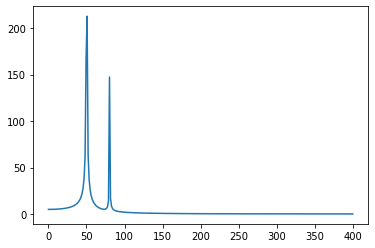

In [ ]:


# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf,  np.abs(yf[:N//2]))
plt.show()

In [ ]:
signal1.shape[0]/2.
#append(signal, labels = 0)
signal_fft = np.fft.fft(signal1)

In [ ]:
signal_fft

array([ 0.18878374+2.02615702e-15j, -0.26624463-2.48743755e-01j,
        0.04441436+1.72855463e-01j, ...,  0.05585847+2.22206101e-01j,
        0.04441436-1.72855463e-01j, -0.26624463+2.48743755e-01j])

In [ ]:
np.linspace(2, 10)

In [ ]:

np.transpose(pd.concat([pd.DataFrame(signal1), pd.DataFrame(signal2)],axis=1))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51205,51206,51207,51208,51209,51210,51211,51212,51213,51214,51215,51216,51217,51218,51219,51220,51221,51222,51223,51224,51225,51226,51227,51228,51229,51230,51231,51232,51233,51234,51235,51236,51237,51238,51239,51240,51241,51242,51243,51244
0,0.001545,0.002083,0.001362,0.001770,0.001449,0.001049,0.001617,0.001727,0.001872,0.002129,0.001816,0.001826,0.001943,0.002345,0.002472,0.002868,0.002713,0.002089,0.002121,0.001638,0.001516,0.002016,0.001706,0.001272,0.000622,0.000224,0.000084,-0.000166,0.000565,0.001353,0.001616,0.001629,0.000651,0.000136,0.000224,0.000153,0.000537,0.000666,0.000564,0.000541,...,-0.000124,-0.000099,-0.000114,-0.000076,-0.000092,-0.000093,-0.000085,-0.000063,-0.000051,-0.000014,0.000002,-0.000017,0.00001,0.000044,0.000045,0.000033,0.000073,0.000058,0.000063,0.000059,0.000063,0.000058,0.000066,0.000039,0.000051,0.000055,0.000027,0.00003,0.000005,0.000013,-0.000005,0.000004,-0.000005,-0.000021,-0.000021,-0.000032,-0.000031,-0.00003,-0.000033,0.0
0,0.004225,0.001963,-0.007297,-0.008683,-0.003217,-0.003107,-0.002591,0.003261,0.005120,0.001207,-0.004158,-0.007905,-0.004044,0.002523,0.002143,0.003002,0.009073,0.007619,0.001197,0.001898,0.003270,-0.000880,-0.001867,0.002694,0.006276,0.008828,0.013367,0.017390,0.018294,0.018011,0.018330,0.020259,0.024463,0.025664,0.019815,0.014093,0.012582,0.009988,0.007886,0.010725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


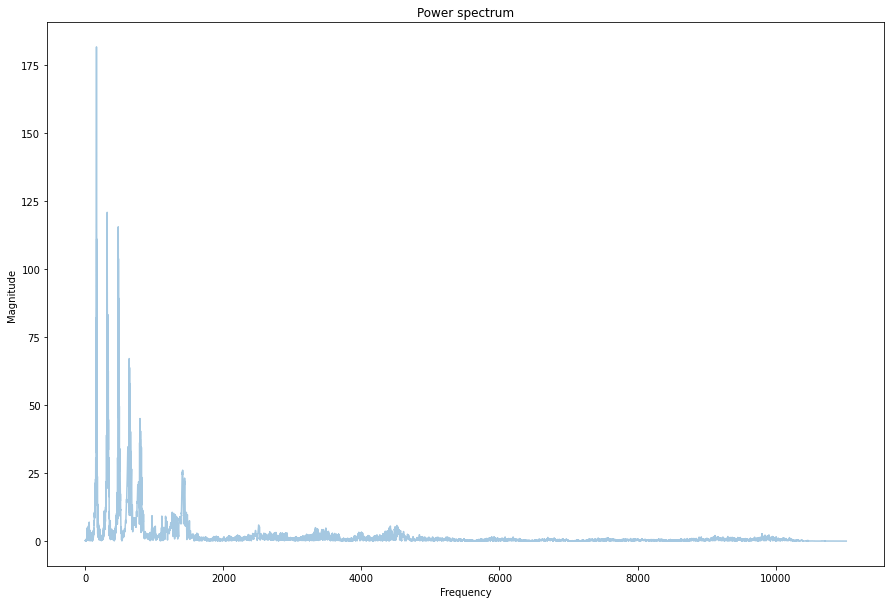

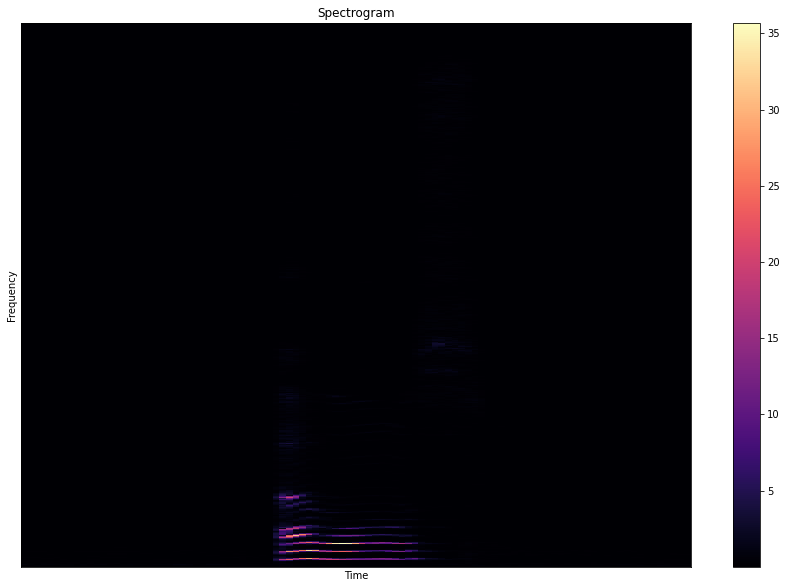

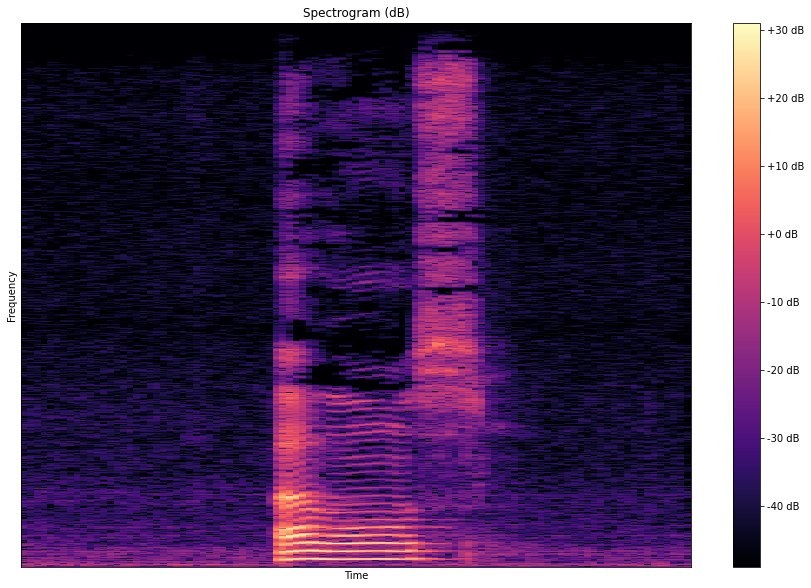

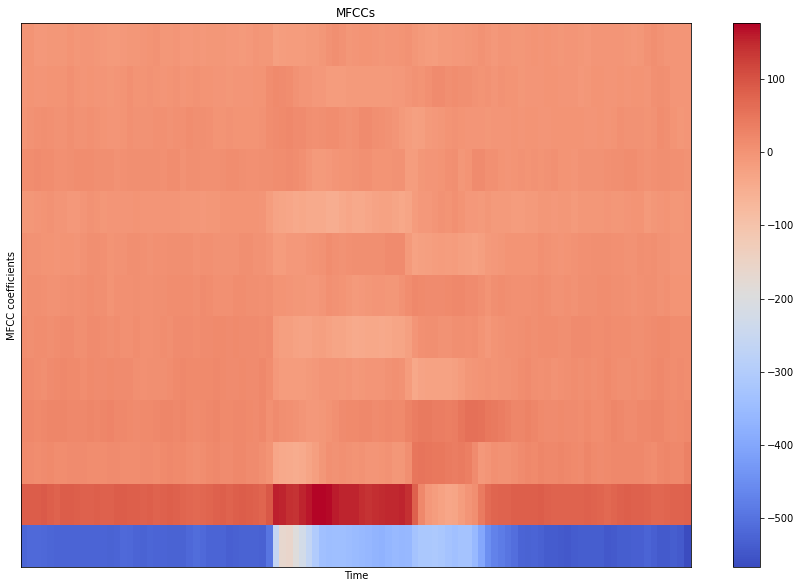

In [ ]:



# FFT -> power spectrum
# perform Fourier transform
fft = np.fft.fft(signal1)

# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)

# create frequency variable
f = np.linspace(0, sample_rate1, len(spectrum))

# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

# plot spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")


# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate1
n_fft_duration = float(n_fft)/sample_rate1

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft = librosa.stft(signal1, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate1, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate1, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")


# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(signal1, sample_rate1, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate1, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()

array(<matplotlib.collections.QuadMesh object at 0x7f504d3c36d0>,
      dtype=object)

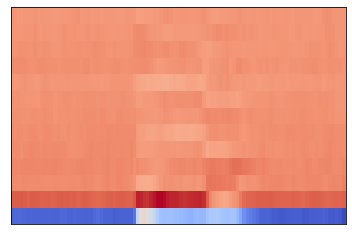

In [ ]:
img = librosa.display.specshow(MFCCs, sr=sample_rate1, hop_length=hop_length)

In [ ]:
MFCCs.shape

(13, 101)